# Resistivity
-------
Today's goals
* Simple physics
* What we measure
* How we measure it

## Electromagnetism
(For babies)

### Coloumb's Law:

* Positive charges:
    * create electric fields that point away from the charge
    * move along the field
    * repel positive charges
* Negative charges:
    * create electric fields the point toward the charge.
    * move against the field.
    * repel negative charges.
* Negative charges attract positive charges.
* Positive charges attract negative charges.

#### Equations:

* Coulomb's Law: $\vec{F} = k_e \frac{q_1 q_2}{r_{1,2}^2}\hat{r}_{1,2}$
* Electric field: $\vec{E} = \vec{F} / q_2 = k_e \frac{q}{r^2}\hat{r} $
* Electrical Potential: $ \phi = k_e \frac{q}{r} $
 
* $\vec{E} = -\nabla \phi $


* $ k_e = \frac{1}{4 \pi \varepsilon_0}$

## Some units
* Charge $q$ : Coulombs (C), (i.e. # of protons.)
* $\vec{E}$ : Electric Field (N/C)
    * Force per unit charge.
* $\phi$ = Volts (V) = (Joules / Coulomb), (Energy per charge)
    * N/C = V/m
* $ k_e = \frac{1}{4 \pi \varepsilon_0}$
* $\varepsilon_0$ : permitivitiy of free space (Farad's per meter)
    * Farad : C / V (units of capacitance, i.e. charges per volt)

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import epsilon_0

def coulomb_electric_field(location, charge, xyz):
    r_vec = xyz - location
    r = np.linalg.norm(r_vec, axis=-1, keepdims=True)

    return 1/(4 * np.pi * epsilon_0) * charge * r_vec/r**3

def coulomb_potential(location, charge, xyz):
    r_vec = xyz - location
    r = np.linalg.norm(r_vec, axis=-1)

    return 1/(4 * np.pi * epsilon_0) * charge * 1/r

In [95]:
def fig1():
    x = np.linspace(-5, 5, 256)
    y = np.linspace(-5, 5, 256)
    z = [0]
    xyz = np.stack(np.meshgrid(x, y, z), axis=-1).squeeze()
    
    e_vec = coulomb_electric_field([0, 0, -1], 1, xyz)
    fig, axs = plt.subplots(1, 3, dpi=200, figsize=(10, 6))
    ax = axs[0]
    ax.pcolormesh(x, y, e_vec[...,0], shading='gouraud')
    ax.set_aspect(1)
    
    ax = axs[1]
    ax.pcolormesh(x, y, e_vec[...,1], shading='gouraud')
    ax.set_aspect(1)
    
    ax = axs[2]
    ax.pcolormesh(x, y, e_vec[...,2], shading='gouraud')
    ax.set_aspect(1)
    
    plt.tight_layout()

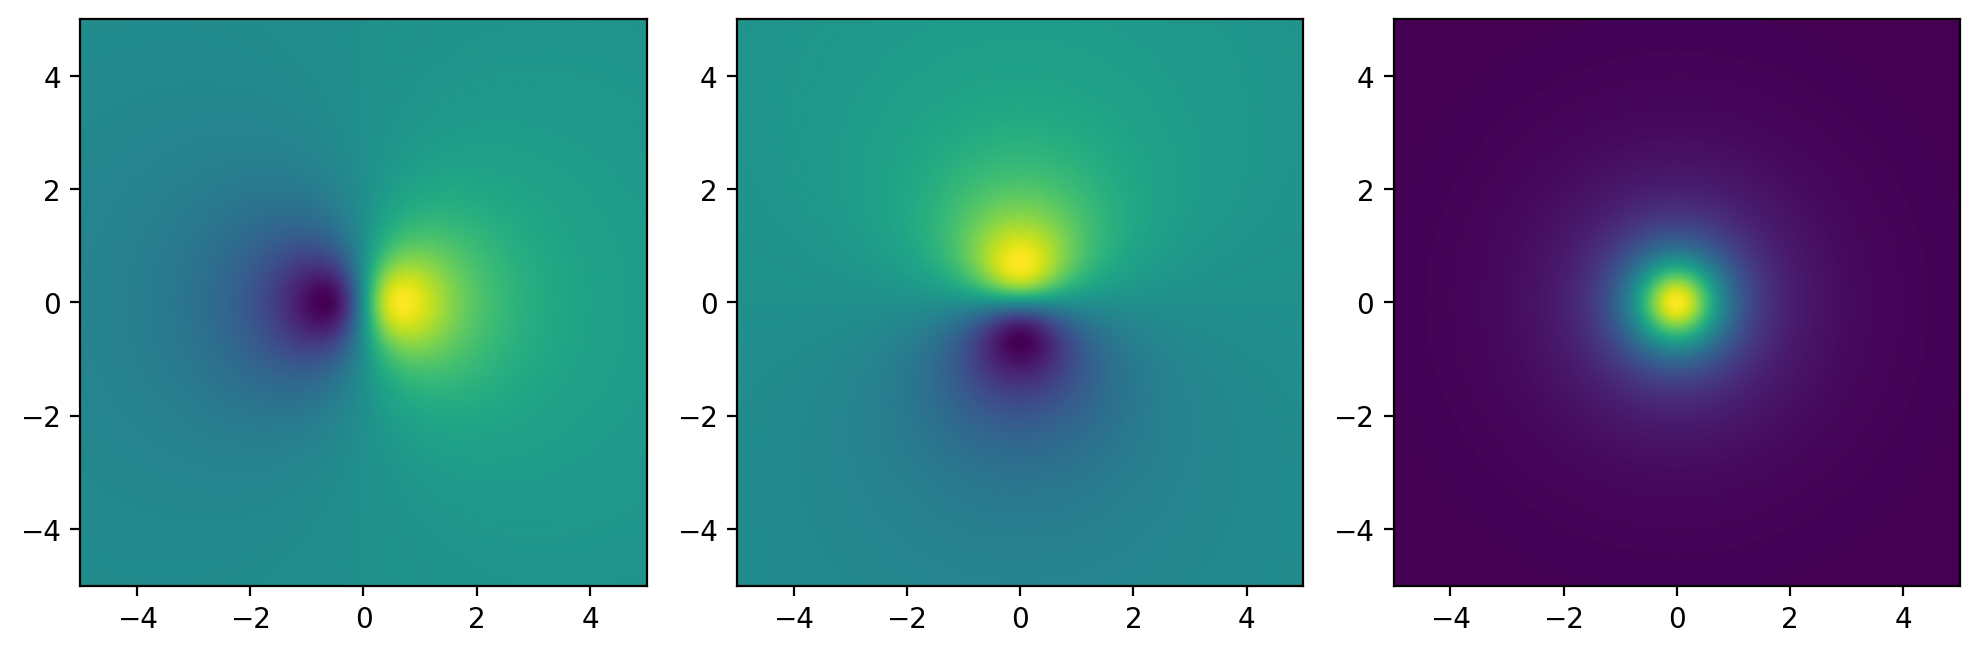

In [96]:
fig1()

In [105]:
def fig2():
    x = np.linspace(-5, 5, 256)
    y = np.linspace(-5, 5, 256)
    z = [0]
    xyz = np.stack(np.meshgrid(x, y, z), axis=-1).squeeze()

    q1 = 1
    s1 = [0, 0, -1]
    e_vec = coulomb_electric_field(s1, q1, xyz)
    v = coulomb_potential(s1, q1, xyz)
    
    fig, axs = plt.subplots(1, 3, dpi=200, figsize=(10, 6))

    ax = axs[0]
    ax.pcolormesh(x, y, v, shading='gouraud')
    ax.streamplot(x, y, e_vec[...,0], e_vec[...,1], color='w')
    ax.set_aspect(1)
    ax.set_title('positive charge')
    
    ax = axs[1]
    ax.pcolormesh(x, y, -v, shading='gouraud')
    ax.streamplot(x, y, -e_vec[...,0], -e_vec[...,1], color='w')
    ax.set_aspect(1)
    ax.set_title('negative charge')
    
    ax = axs[2]
    
    q1 = 1
    s1 = [-0.5, 0, -1]
    
    q2 = -1
    s2 = [0.5, 0, -1]
    
    e_vec = coulomb_electric_field(s1, q1, xyz) + coulomb_electric_field(s2, q2, xyz)
    v = coulomb_potential(s1, q1, xyz) + coulomb_potential(s2, q2, xyz)

    ax.pcolormesh(x, y, v, shading='gouraud')
    ax.streamplot(x, y, e_vec[...,0], e_vec[...,1], color='w')
    ax.set_title('positive and negative charge')
    ax.set_aspect(1)
    
    plt.tight_layout()

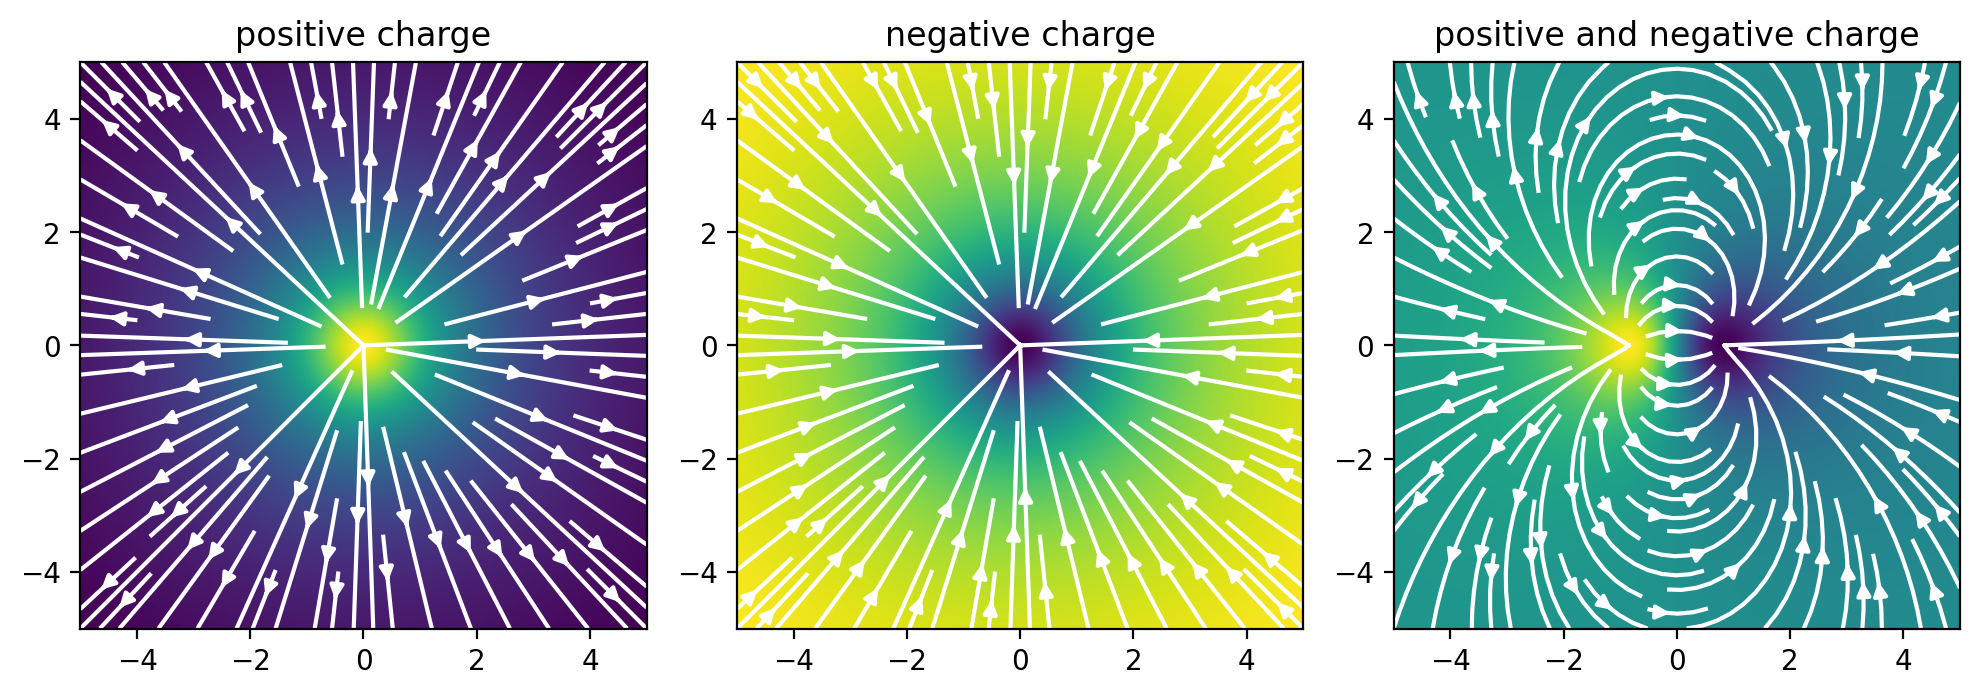

In [106]:
fig2()

### Ampere's Law
* Negative charges moving together create an electric current
* Electrical Currents create magnetic fields!

$$ \nabla \times \vec{B} = \mu_0 \vec{J}$$

#### Units:
* Amperes (A): = C/s, Electrical current, # of charges moving past a point per second:
* $\vec{J}$, Current density: A/(m^2), The density of currents going through a given surface.
* $\vec{B}$, Magnetic flux density: Tesla (T) = 1 N / (A M), magnetic field, Force per amp per meter
* $\mu_0$: magnetic permeability of free space: $4 \pi 10^{-7}$ (Henry / meter) = (N/A^2),
* Okay okay, what is a henry:
    * Techinally units of $\vec{H}$ (the magnetic field)

In [107]:
from geoana.em.static import LineCurrentFreeSpace

In [130]:
def fig3():
    x = np.linspace(-50, 50, 256)
    y = np.linspace(-50, 50, 256)
    z = [0]
    xyz = np.stack(np.meshgrid(x, y, z), axis=-1).squeeze()

    wire = LineCurrentFreeSpace([[0, 0, -10], [0, 0, 10]])

    b_vec = wire.magnetic_flux_density(xyz)
    b = np.linalg.norm(e_vec, axis=-1)

    plt.figure(dpi=200)
    ax = plt.gca()
    
    ax.pcolormesh(x, y, b, shading='gouraud')
    ax.streamplot(x, y, b_vec[...,0], b_vec[...,1], color='w')
    ax.set_aspect(1)
    ax.set_title("Magnetic field due to current carrying wire")

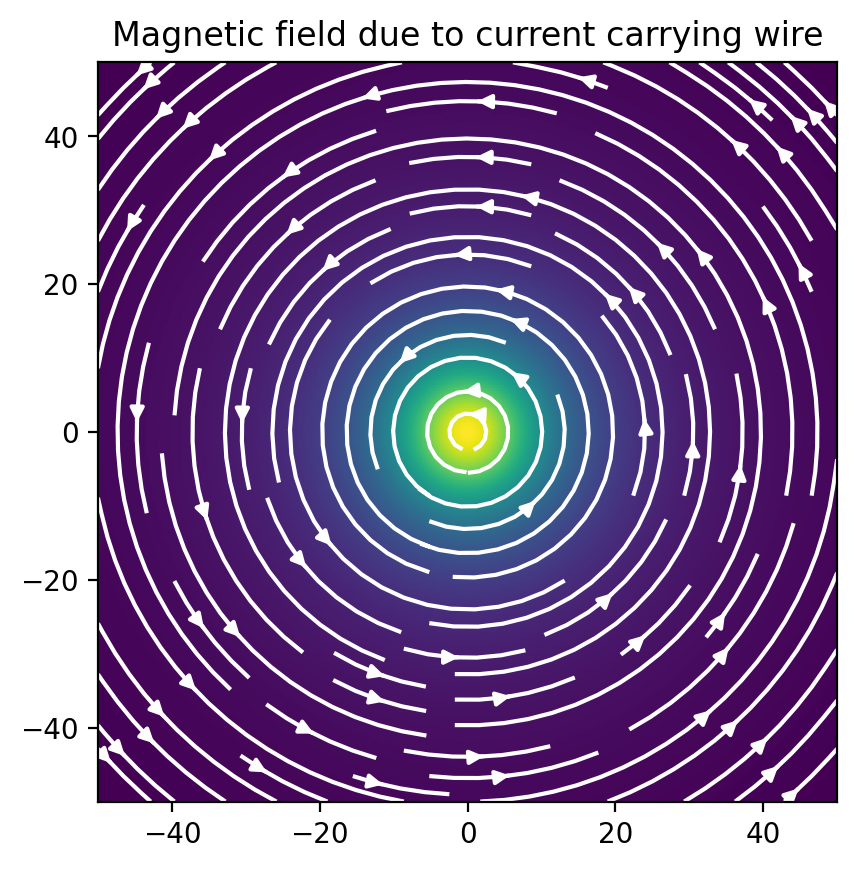

In [131]:
fig3()